# Pymaceuticals
## Data Analysis
### Matthew Stewart - March 23, 2019
---

### Initial Setup

In [27]:
# Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [28]:
# Hide warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Read data files and initialize dataframes
clinicalTrialData = 'Resources/clinicaltrial_data.csv'
mouseDrugData = 'Resources/mouse_drug_data.csv'

clinical_df = pd.read_csv(clinicalTrialData)
mouse_df = pd.read_csv(mouseDrugData)

# Merge into single dataframe
pymaceuticals_df = pd.merge(clinical_df, mouse_df, on = 'Mouse ID')
pymaceuticals_df.sort_values(by = 'Timepoint', inplace = True)
pymaceuticals_df.reset_index(drop = True, inplace = True)
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,i635,0,45.0,0,Propriva
2,g791,0,45.0,0,Ramicane
3,w746,0,45.0,0,Propriva
4,r107,0,45.0,0,Propriva


In [30]:
# Check for possible missing information
pymaceuticals_df.count()

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

In [31]:
# Check datatypes
pymaceuticals_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug                   object
dtype: object

---

### Tumor Response to Treatment

In [32]:
pyma_mean_group = pymaceuticals_df.groupby(['Drug', 'Timepoint'])
pyma_mean_df = pd.DataFrame(pyma_mean_group['Tumor Volume (mm3)'].mean())
pyma_mean_df.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

In [33]:
pyma_sem_group = pymaceuticals_df.groupby(['Drug', 'Timepoint'])
pyma_sem_df = pd.DataFrame(pyma_sem_group['Tumor Volume (mm3)'].sem())
pyma_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [66]:
pyma_mean_df_unstack = pyma_mean_df.unstack(level = 0)
pyma_mean_df_unstack.columns = pyma_mean_df_unstack.columns.droplevel()
pyma_mean_df_unstack.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [67]:
pyma_sem_df_unstack = pyma_sem_df.unstack(level = 0)
pyma_sem_df_unstack.columns = pyma_sem_df_unstack.columns.droplevel()
pyma_sem_df_unstack.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


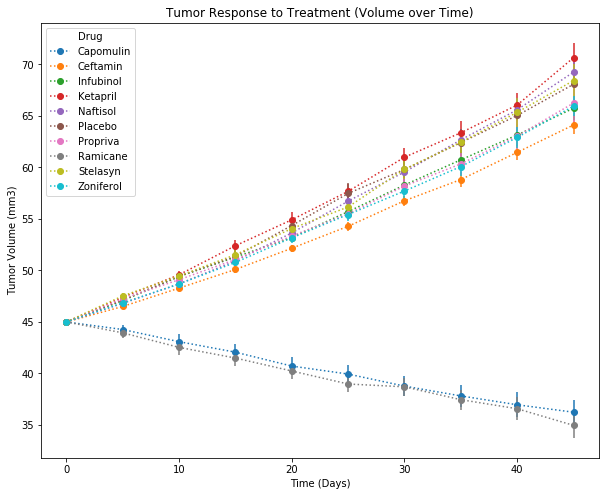

In [71]:
pyma_mean_df_unstack.plot(yerr = pyma_sem_df_unstack, marker = 'o', linestyle = ':', figsize = (10,8))
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment (Volume over Time)')
plt.savefig('Images/TumorResponseOverTime.png')
plt.show()